In [21]:
# imports
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import io
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%config InlineBackend.figure_formats = {'svg',}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

In [2]:
# read the csvs in the res/ directory
csvs = os.listdir('res')
buff = io.StringIO()
for n, c in enumerate(csvs):
    with open(f'res/{c}') as f:
        if buff.tell():
            try:
                f.readline()
            except:
                continue
        buff.write(f.read())
buff.seek(0)
df = pd.read_csv(buff)

In [31]:
# check that most fields are constant
assert all(df['Total Number of Trials'] == 1024)
assert all(df['Training Batch Size'] == 64)
assert all(df['KL Batch Size'] == 256)
assert all(df['x Sequence Length'] == 32)
assert all(df['x Vector Length'] == 16)
assert all(df['x Standard Deviation'] == 1)
assert all(df['theta_3 Standard Deviation'] == 1)
assert all(df['Learning Rate'] == 1e-1)
assert all(df['LR Reduction Patience'] == 16)
assert all(df['LR Reduction Threshold'] == 1)
# assert all(df['LR Reduction min'] == 1e-3)
assert all(df['LR Reduction Factor'] == 1e-1)
assert all(df['Optimizer'] == 'adam')
assert all(df['AIS Burn-in'] == 32)

df.head()

,Seed,Total Number of Trials,Training Batch Size,KL Batch Size,x Sequence Length,x Vector Length,p_1,p_2,x Standard Deviation,theta_3 Standard Deviation,Learning Rate,LR Reduction Patience,LR Reduction Threshold,LR Reduction Factor,LR Reduction min,Estimator,Optimizer,Number of Monte Carlo Samples,AIS Burn-in,Trial,SSE theta_1,SSE theta_2,SSE theta_3,Time Since Start,zhat Estimate,Log ESS,KL Batch Estimate
0,17,1024,64,256,32,16,0.25,0.75,1.0,1.0,0.1,16,1.0,0.1,0.01,srswor,adam,512,32,1,1.058825,2.101510,441.724945,0 days 00:00:00.333606,-37.315952,1.879952,51.720703
1,17,1024,64,256,32,16,0.25,0.75,1.0,1.0,0.1,16,1.0,0.1,0.01,srswor,adam,512,32,2,0.865364,1.824013,412.215454,0 days 00:00:00.607292,-39.956100,1.887529,43.070236
2,17,1024,64,256,32,16,0.25,0.75,1.0,1.0,0.1,16,1.0,0.1,0.01,srswor,adam,512,32,3,0.691980,1.566411,383.313873,0 days 00:00:00.877859,-35.406620,2.318548,41.068787
3,17,1024,64,256,32,16,0.25,0.75,1.0,1.0,0.1,16,1.0,0.1,0.01,srswor,adam,512,32,4,0.542466,1.333065,355.382996,0 days 00:00:01.094151,-39.231827,2.059232,38.261745
4,17,1024,64,256,32,16,0.25,0.75,1.0,1.0,0.1,16,1.0,0.1,0.01,srswor,adam,512,32,5,0.414630,1.123038,329.876434,0 days 00:00:01.306424,-36.200527,1.652401,33.242184


In [8]:
# KL Batch Estimate Stats
df[df['Trial'] == 1024].groupby(['Number of Monte Carlo Samples', 'Estimator', 'p_1', 'p_2'])['KL Batch Estimate'].describe()

count        mean  \
Number of Monte Carlo Samples Estimator    p_1  p_2                       
1                             ecb          0.25 0.00  100.0    0.049564   
                                                0.25  100.0    0.222894   
                                                0.75  100.0    4.299002   
                                           0.75 0.00  100.0    0.060172   
                                                0.25  100.0    0.226396   
                                                0.75  100.0    4.359442   
                              fs           0.25 0.00  100.0   13.260498   
                                                0.25  100.0   13.485173   
                                                0.75  100.0   12.992720   
                                           0.75 0.00  100.0   30.621251   
                                                0.25  100.0   30.956134   
                                                0.75  100.0   22.328515   
                              rej          0.25 0.00  100.0   24.371682   
                                                0.25  100.0   14.521573   
                                                0.75  100.0   17.913524   
                                           0.75 0.00  100.0   51.903736   
                                                0.25  100.0   29.599209   
                                                0.75  100.0   12.121269   
                              srswor       0.25 0.00  100.0   12.905772   
                                                0.25  100.0   12.887271   
                                                0.75  100.0   11.327589   
                                           0.75 0.00  100.0   28.257377   
                                                0.25  100.0   27.644395   
                                                0.75  100.0   18.986301   
128                           ais-cb-count 0.25 0.00   83.0    4.333848   
                                                0.25   11.0    4.365568   
                                                0.75   48.0    2.875363   
                                           0.75 0.00   59.0    5.958196   
                                                0.25   58.0    5.599816   
                                                0.75   54.0    2.421391   
                              ais-cb-gibbs 0.25 0.00   15.0    1.172298   
                                                0.25   11.0    1.422966   
                                                0.75    8.0    0.991087   
                                           0.75 0.00   19.0    1.722519   
                                                0.25   15.0    1.714692   
                                                0.75   16.0    0.509061   
                              fs           0.25 0.00  100.0    5.812295   
                                                0.25  100.0    6.185298   
                                                0.75  100.0    5.457000   
                                           0.75 0.00  100.0    9.747985   
                                                0.25  100.0    9.609568   
                                                0.75  100.0    5.408066   
                              rej          0.25 0.00  100.0   22.068965   
                                                0.25  100.0    9.330760   
                                                0.75  100.0   12.034425   
                                           0.75 0.00  100.0  161.503025   
                                                0.25  100.0  148.503391   
                                                0.75  100.0   41.026769   
                              srswor       0.25 0.00  100.0    4.648208   
                                                0.25  100.0    4.714795   
                                                0.75  100.0    3.524384   
                                           0.75 0.00  100.0    8.111067   
    

In [10]:
# SSE theta_1 stats
df[df['Trial'] == 1024].groupby(['Number of Monte Carlo Samples', 'Estimator', 'p_1', 'p_2'])['SSE theta_1'].describe()

count      mean  \
Number of Monte Carlo Samples Estimator    p_1  p_2                     
1                             ecb          0.25 0.00  100.0  0.000201   
                                                0.25  100.0  0.000238   
                                                0.75  100.0  0.000747   
                                           0.75 0.00  100.0  0.000111   
                                                0.25  100.0  0.000191   
                                                0.75  100.0  0.000743   
                              fs           0.25 0.00  100.0  0.000201   
                                                0.25  100.0  0.000636   
                                                0.75  100.0  0.062045   
                                           0.75 0.00  100.0  0.000111   
                                                0.25  100.0  0.000724   
                                                0.75  100.0  0.062556   
                              rej          0.25 0.00  100.0  1.342577   
                                                0.25  100.0  0.304426   
                                                0.75  100.0  5.691999   
                                           0.75 0.00  100.0  1.125751   
                                                0.25  100.0  0.130737   
                                                0.75  100.0  5.645206   
                              srswor       0.25 0.00  100.0  0.000201   
                                                0.25  100.0  0.000284   
                                                0.75  100.0  0.000593   
                                           0.75 0.00  100.0  0.000111   
                                                0.25  100.0  0.000304   
                                                0.75  100.0  0.000535   
128                           ais-cb-count 0.25 0.00   83.0  0.000170   
                                                0.25   11.0  0.000161   
                                                0.75   48.0  0.000435   
                                           0.75 0.00   59.0  0.000122   
                                                0.25   58.0  0.000368   
                                                0.75   54.0  0.001725   
                              ais-cb-gibbs 0.25 0.00   15.0  0.000258   
                                                0.25   11.0  0.000168   
                                                0.75    8.0  0.000798   
                                           0.75 0.00   19.0  0.000177   
                                                0.25   15.0  0.000338   
                                                0.75   16.0  0.001747   
                              fs           0.25 0.00  100.0  0.000201   
                                                0.25  100.0  0.000559   
                                                0.75  100.0  0.006112   
                                           0.75 0.00  100.0  0.000111   
                                                0.25  100.0  0.000377   
                                                0.75  100.0  0.002385   
                              rej          0.25 0.00  100.0  1.528577   
                                                0.25  100.0  0.308367   
                                                0.75  100.0  1.060061   
                                           0.75 0.00  100.0  2.388903   
                                                0.25  100.0  2.519941   
                                                0.75  100.0  3.746794   
                              srswor       0.25 0.00  100.0  0.000201   
                                                0.25  100.0  0.000285   
                                                0.75  100.0  0.000519   
                                           0.75 0.00  100.0  0.000111   
                                                0.25  100.0  0.000315   
                                       

In [12]:
# SSE theta_2 stats (skipped p_2 == 0, since it is untrained, and Estimator == ecb, because it's fixed at p_2 == 0)
df[(df['Trial'] == 1024) & (df['p_2'] != 0) & (df['Estimator'] != "ecb")].groupby(['Number of Monte Carlo Samples', 'Estimator', 'p_1', 'p_2'])['SSE theta_2'].describe()

count      mean  \
Number of Monte Carlo Samples Estimator    p_1  p_2                     
1                             fs           0.25 0.25  100.0  0.027843   
                                                0.75  100.0  0.031119   
                                           0.75 0.25  100.0  0.025987   
                                                0.75  100.0  0.030654   
                              rej          0.25 0.25  100.0  6.169658   
                                                0.75  100.0  4.141748   
                                           0.75 0.25  100.0  5.586296   
                                                0.75  100.0  4.140204   
                              srswor       0.25 0.25  100.0  0.192256   
                                                0.75  100.0  0.001074   
                                           0.75 0.25  100.0  0.195292   
                                                0.75  100.0  0.001051   
128                           ais-cb-count 0.25 0.25   11.0  0.020026   
                                                0.75   48.0  0.000585   
                                           0.75 0.25   58.0  0.008431   
                                                0.75   54.0  0.001254   
                              ais-cb-gibbs 0.25 0.25   11.0  0.044723   
                                                0.75    8.0  0.000420   
                                           0.75 0.25   15.0  0.021713   
                                                0.75   16.0  0.002083   
                              fs           0.25 0.25  100.0  0.011116   
                                                0.75  100.0  0.003397   
                                           0.75 0.25  100.0  0.001986   
                                                0.75  100.0  0.001564   
                              rej          0.25 0.25  100.0  0.425587   
                                                0.75  100.0  1.544245   
                                           0.75 0.25  100.0  1.716004   
                                                0.75  100.0  4.928471   
                              srswor       0.25 0.25  100.0  0.015271   
                                                0.75  100.0  0.000582   
                                           0.75 0.25  100.0  0.014624   
                                                0.75  100.0  0.001155   
256                           ais-cb-count 0.25 0.25   35.0  0.014160   
                                                0.75   23.0  0.000683   
                                           0.75 0.25   24.0  0.006540   
                                                0.75   24.0  0.001288   
                              ais-cb-gibbs 0.25 0.25    7.0  0.029854   
                                                0.75    5.0  0.000411   
                                           0.75 0.25    8.0  0.010288   
                                                0.75    7.0  0.001596   
                              fs           0.25 0.25  100.0  0.008693   
                                                0.75  100.0  0.002992   
                                           0.75 0.25  100.0  0.001878   
                                                0.75  100.0  0.001178   
                              rej          0.25 0.25  100.0  0.269279   
                                                0.75  100.0  1.326129   
                                           0.75 0.25  100.0  1.668505   
                                                0.75  100.0  4.192488   
                              srswor       0.25 0.25  100.0  0.012021   
                                                0.75  100.0  0.000587   
                                           0.75 0.25  100.0  0.011423   
                                                0.75  100.0  0.000978   
512                           ais-cb-count 0.25 0.25   15.0  0.015912   
                                       

In [13]:
# SSE theta_3 stats
df[df['Trial'] == 1024].groupby(['Number of Monte Carlo Samples', 'Estimator', 'p_1', 'p_2'])['SSE theta_3'].describe()

count        mean  \
Number of Monte Carlo Samples Estimator    p_1  p_2                       
1                             ecb          0.25 0.00  100.0   34.573903   
                                                0.25  100.0   34.760966   
                                                0.75  100.0   38.833253   
                                           0.75 0.00  100.0   49.713923   
                                                0.25  100.0   49.755745   
                                                0.75  100.0   52.692217   
                              fs           0.25 0.00  100.0  265.241178   
                                                0.25  100.0  267.423975   
                                                0.75  100.0  261.919220   
                                           0.75 0.00  100.0  239.888050   
                                                0.25  100.0  241.124898   
                                                0.75  100.0  208.159948   
                              rej          0.25 0.00  100.0  296.400020   
                                                0.25  100.0  260.670785   
                                                0.75  100.0  255.269806   
                                           0.75 0.00  100.0  264.742631   
                                                0.25  100.0  222.092997   
                                                0.75  100.0   97.493795   
                              srswor       0.25 0.00  100.0  261.821004   
                                                0.25  100.0  261.516917   
                                                0.75  100.0  246.204202   
                                           0.75 0.00  100.0  231.150148   
                                                0.25  100.0  228.776868   
                                                0.75  100.0  193.392710   
128                           ais-cb-count 0.25 0.00   83.0  154.392646   
                                                0.25   11.0  148.759631   
                                                0.75   48.0  126.558623   
                                           0.75 0.00   59.0  115.106724   
                                                0.25   58.0  111.611488   
                                                0.75   54.0   82.966213   
                              ais-cb-gibbs 0.25 0.00   15.0   78.727571   
                                                0.25   11.0   82.353506   
                                                0.75    8.0   72.450701   
                                           0.75 0.00   19.0   72.646416   
                                                0.25   15.0   69.807898   
                                                0.75   16.0   58.088819   
                              fs           0.25 0.00  100.0  180.092428   
                                                0.25  100.0  185.601104   
                                                0.75  100.0  176.910811   
                                           0.75 0.00  100.0  143.940461   
                                                0.25  100.0  142.946001   
                                                0.75  100.0  111.875089   
                              rej          0.25 0.00  100.0  265.573953   
                                                0.25  100.0  212.366891   
                                                0.75  100.0  230.988703   
                                           0.75 0.00  100.0  501.658027   
                                                0.25  100.0  476.627393   
                                                0.75  100.0  221.343199   
                              srswor       0.25 0.00  100.0  160.886063   
                                                0.25  100.0  162.465478   
                                                0.75  100.0  143.431534   
                                           0.75 0.00  100.0  131.705741   
    

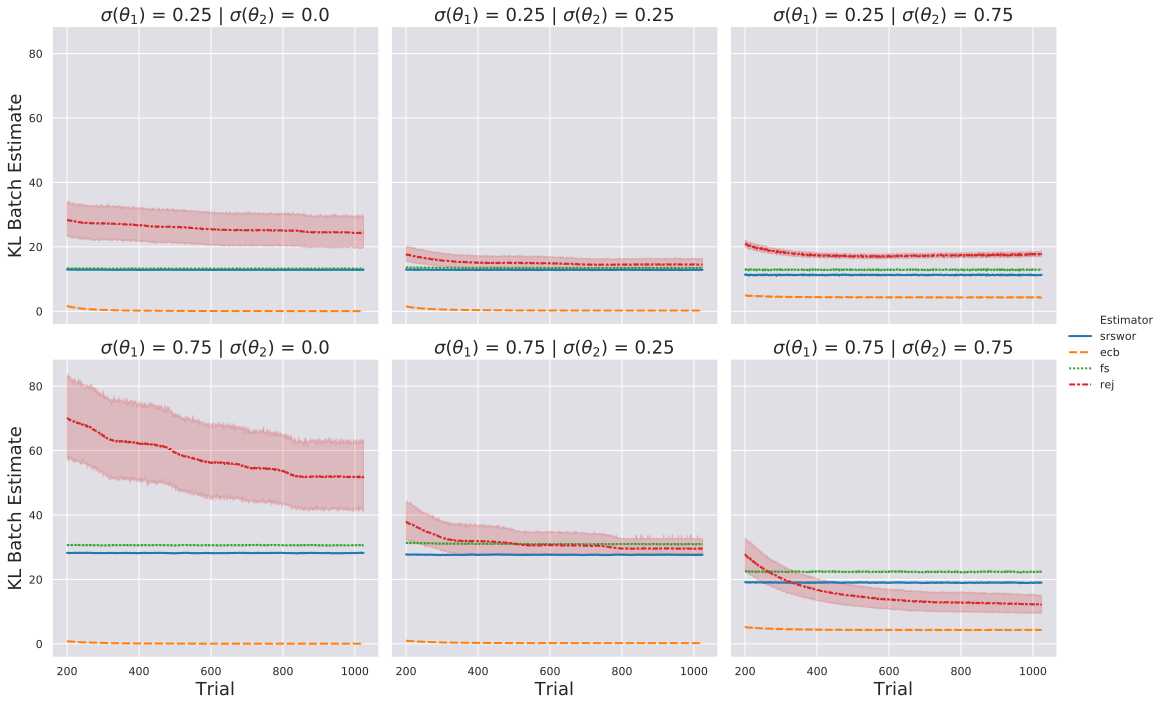

In [35]:
# visualize convergence of single-sample estimators
df_ = df[(df['Number of Monte Carlo Samples'] == 1) & (df['Trial'] >= 200)].rename(columns={'p_1': r'$\sigma(\theta_1)$', 'p_2': r'$\sigma(\theta_2)$'})
sns.factorlplot(
    x="Trial",
    y="KL Batch Estimate",
    hue="Estimator", style="Estimator",
    col=r'$\sigma(\theta_2)$',
    row=r'$\sigma(\theta_1)$',
    kind="line",
    data=df_,
)

In [ ]:
# Visualize convergence of estimators at 256 Monte Carlo Samples
df_ = df[(df['Number of Monte Carlo Samples'] == 256)].rename(columns={'p_1': r'$\sigma(\theta_1)$', 'p_2': r'$\sigma(\theta_2)$'})
sns.relplot(
    x="Trial",
    y="KL Batch Estimate",
    hue="Estimator", style="Estimator",
    col=r'$\sigma(\theta_2)$',
    row=r'$\sigma(\theta_1)$',
    kind="line",
    data=df_,
)